# Homework 02

### Team:
- Ariana Villegas 
- John-Ryan Romo

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
from src.armedBandit import *
from src.policy import *
from src.tester import *

### Question 1

**(a)** Initialize all $Q_t(a)=0$ for $a=1,\cdots, N$. Simulate an $\epsilon$-Greedy agent:
$$
A_t = \begin{cases}
    \arg \max_{1\leq a \leq N}{Q_t(a)} & \text{with probability $1-\epsilon$}\\
    {\cal U}\left(\left\{ 1, \cdots, N\right\} \right) & \text{with probability $\epsilon$}
\end{cases}
$$

where $0\leq \epsilon \leq 1$ and ${\cal U}\left( S \right)$ denotes the uniform distribution over the set $S$. Plot the average reward $\bar{R}_t$ for $t=1, \cdots, T$ on the same figure for the following: $\epsilon=0$, $\epsilon=0.1$, $\epsilon=0.25$. Remember to add a legend for the three curves. Also on a separate single figure, plot  the fraction of times the optimal action was selected for $t=1, \cdots, T$ for $\epsilon=0$, $\epsilon=0.1$, $\epsilon=0.25$.

In [3]:
n = 10
t = 1000
init = 0
mu = 4
tester = Tester(n, t, init, mu)

<Figure size 640x480 with 0 Axes>

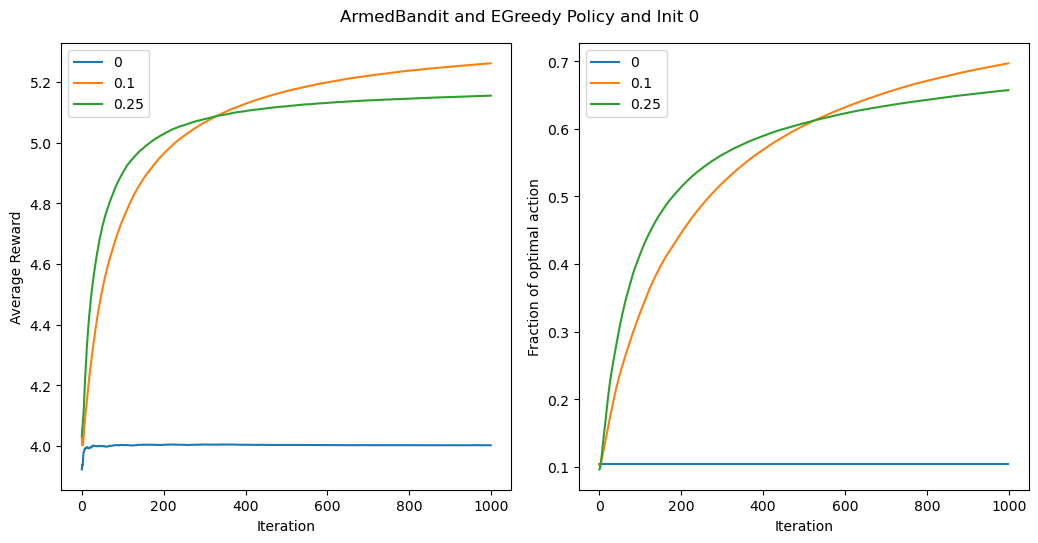

In [11]:
epsilon = [0, 0.1, 0.25]
tester.testBandit(ArmedBandit, EGreedy, epsilon)

<Figure size 640x480 with 0 Axes>

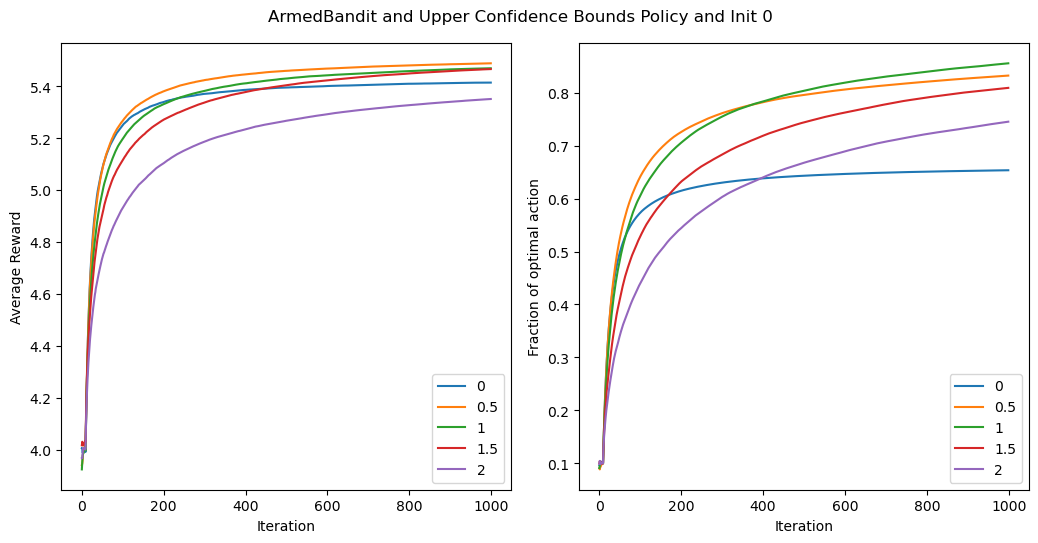

In [5]:
confidence = [0, 0.5, 1, 1.5, 2]
tester.testBandit(ArmedBandit, UCB, confidence)

**(b)** Repeat $Q_1(a)$, with the Initialization that all $Q_t(a) = 5$ for $a = 1,··· ,N$.

<Figure size 640x480 with 0 Axes>

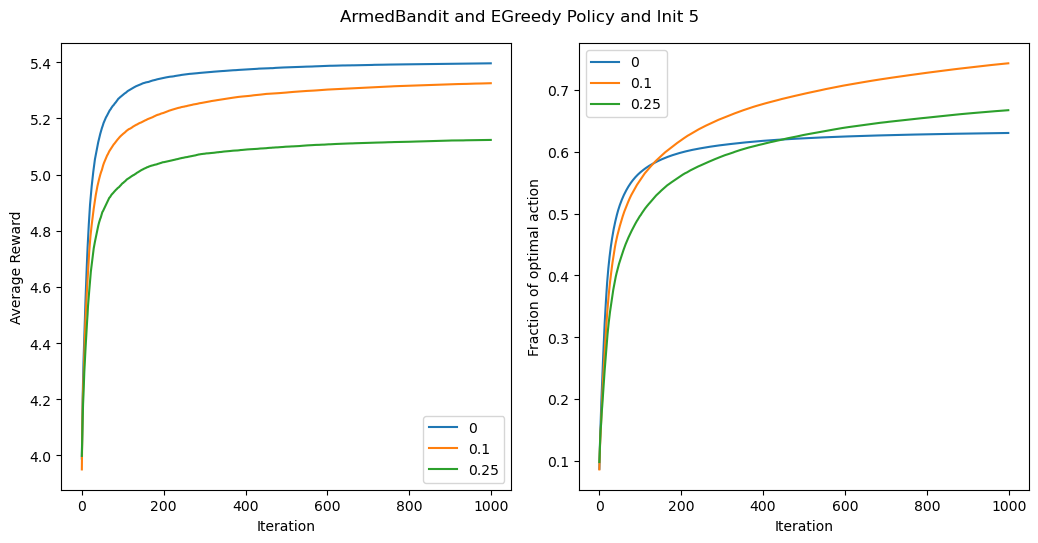

In [6]:
tester.set_init(5)
tester.testBandit(ArmedBandit, EGreedy, epsilon)  

<Figure size 640x480 with 0 Axes>

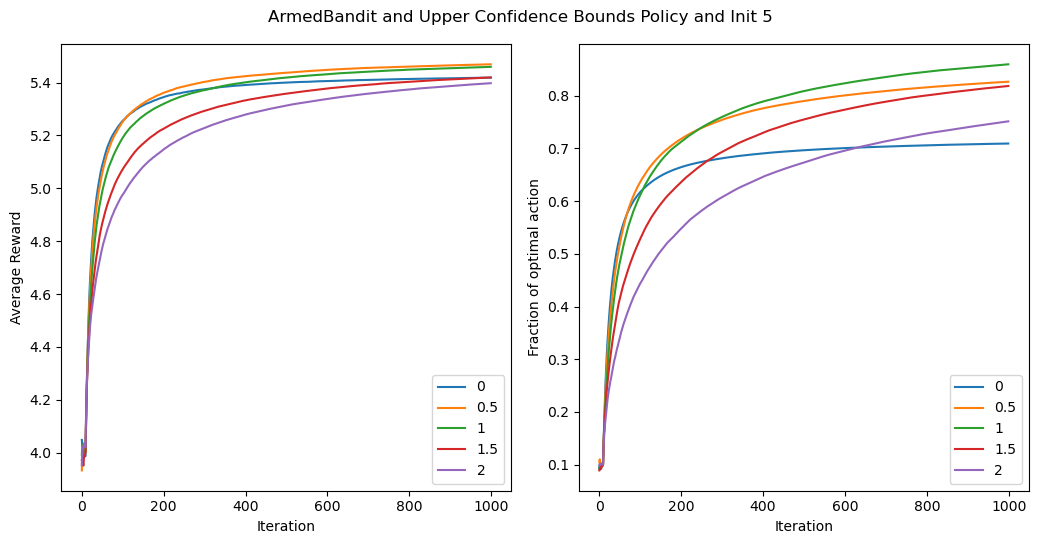

In [7]:
tester.testBandit(ArmedBandit, UCB, confidence)

**(C)** Now suppose that an agent select its actions according to the action probabilities $\pi_t(a)$:
$$
    A_t \sim \pi_t(a)
$$
where
$$
    \pi_t(a) \triangleq Pr \left(A_t=a \right) \ = \ \frac{e^{H_t(a)}}{\sum_c e^{H_t(c)}}
$$
is the Gibbs/Boltzman/soft-max distribution. At each time instant $t$, after executing action $A_t$ and receiving reward $R_t$, the agent updates $H_t(a)$'s according the following stochastic gradient ascent (SGA) algorithm:
$$
H_{t+1}(a) = \begin{cases}
    H_{t}(a) + \alpha \left(R_t-\bar{R}_t \right) \left(1 - \pi_t(a) \right) & \text{if $a = A_t$}\\
    H_{t}(a) - \alpha \left(R_t-\bar{R}_t \right) \pi_t(a) & \text{if $a \neq A_t$}
\end{cases}
$$
with the initialization $H_t(a)=0$ for $a=1,\cdots, N$. Simulate this SGA learning agent, both with and without baseline, and plot the average reward $\bar{R}_t$ for $t=1, \cdots, T$ on the same figure for the following: $\alpha=0.1$, $\alpha=0.4$. Add a legend. Also on a separate single figure, plot  the fraction of times the optimal action was selected,  both with and without baseline, for $t=1, \cdots, T$ for $\alpha=0.1$ and $\alpha=0.4$.

<Figure size 640x480 with 0 Axes>

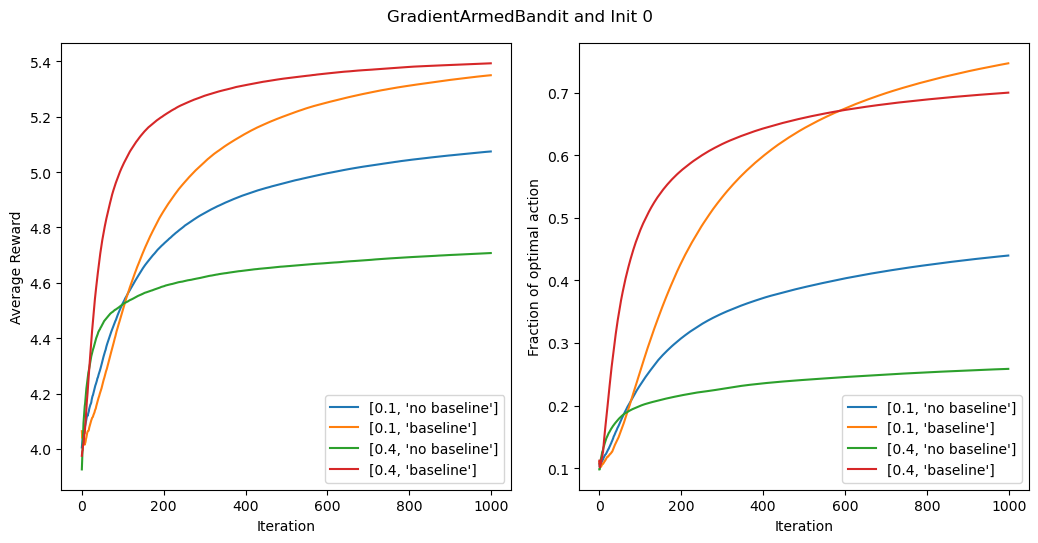

In [8]:
tester.set_init(0)
alpha = [[0.1, False], [0.1, True], [0.4, False], [0.4, True]]
tester.testBandit(GradientArmedBandit, None, alpha)